In [1]:
import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

In [2]:
plt.rcParams["font.family"] = "Linux Libertine O"
plt.rcParams["font.size"] = 30

## Getting Car Patterns

In [3]:
data = pd.read_csv('../share/tpms-merged-5.csv')
cars = pd.read_csv('../data/cars.csv')
data.shape

(111903, 17)

### By Weekday

In [4]:
d = data.set_index(pd.to_datetime(data['time']))
sel = d.groupby(pd.Grouper(freq='8H')).size().to_frame()
sel[sel > 1] = 1

sel['weekday'] = sel.index.to_series().dt.weekday
sel = sel.groupby(by='weekday').sum()
grouped = sel.groupby(by='weekday').apply(func='mean')
grouped

,0
weekday,
0,23.0
1,24.0
2,16.0
3,24.0
4,21.0
5,1.0
6,0.0


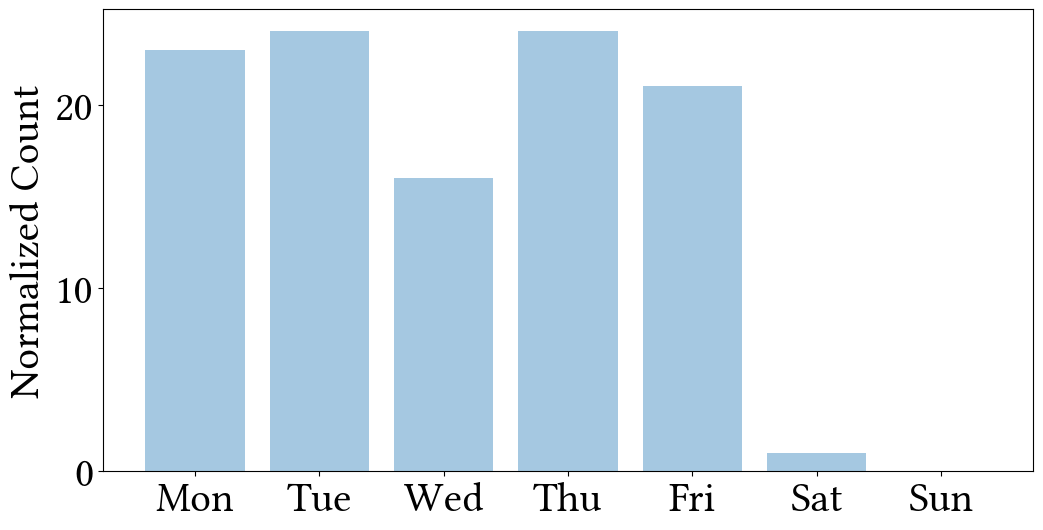

In [5]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(grouped.index, grouped[0].to_numpy(),alpha=.4)

ax.set_ylabel('Normalized Count')

ax.set_xticks(np.arange(7))
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.savefig('../pics/static/all_weekday.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [6]:
index = 10
car = cars.loc[index,['id1','id2','id3','id4']].to_numpy()
selected = data[data["id"].isin(car)]
selected = selected.set_index(pd.to_datetime(selected['time']))

In [7]:
sel = selected.groupby(pd.Grouper(freq='1T')).size().to_frame()
sel[sel > 1] = 1

sel['weekday'] = sel.index.to_series().dt.weekday
sel = sel.groupby(by='weekday').sum()
grouped = sel.groupby(by='weekday').apply(func='mean')

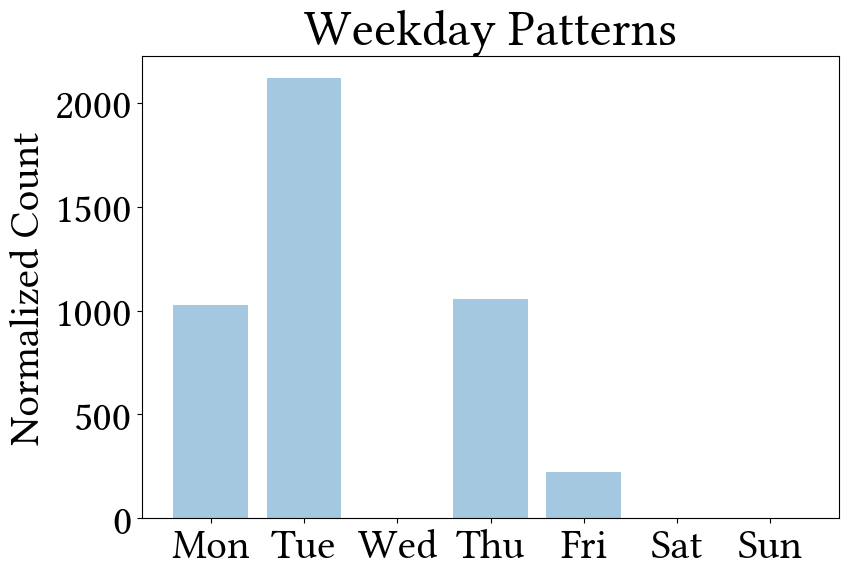

In [8]:
fig, ax = plt.subplots(figsize=(9,6))

ax.bar(grouped.index, grouped[0].to_numpy(),alpha=.4)

ax.set_ylabel('Normalized Count')
ax.set_title('Weekday Patterns')

ax.set_xticks(np.arange(7))
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.savefig(f'../pics/static/car{index+1}_weekday.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [9]:
for i in range(13):
    car = cars.loc[i,['id1','id2','id3','id4']].to_numpy()
    selected = data[data["id"].isin(car)]
    selected = selected.set_index(pd.to_datetime(selected['time']))

    sel = selected.groupby(pd.Grouper(freq='1T')).size().to_frame()
    sel[sel > 1] = 1

    sel['weekday'] = sel.index.to_series().dt.weekday
    sel = sel.groupby(by='weekday').sum()
    grouped = sel.groupby(by='weekday').apply(func='mean')

    grouped = grouped/np.max(grouped)

    fig, ax = plt.subplots(figsize=(9,6))

    ax.bar(grouped.index, grouped[0].to_numpy(),alpha=.4)

    ax.set_ylabel('Normalized Count')
    ax.set_xlabel('Weekday')

    ax.set_xticks(np.arange(7))
    ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

    plt.savefig(f'../pics/static/weekday/car{i+1}_weekday.pdf',format='pdf',bbox_inches='tight')
    plt.close()


### By Hours

In [10]:
index = 0
car = cars.loc[index,['id1','id2','id3','id4']].to_numpy()
selected = data[data["id"].isin(car)]
selected = selected.set_index(pd.to_datetime(selected['time']))

In [11]:
sel = selected.groupby(pd.Grouper(freq='1H')).size().to_frame()
sel[sel > 1] = 1

pivot_table = sel.pivot_table(
    values=0,
    index=sel.index.date,
    columns=sel.index.hour,
    aggfunc="sum",
)

In [12]:
# Function to find the first match
def find_first_match(row):
    d = np.where(row == 1)
    if d[0].any():
        return d[0][0]
    return None

def find_last_match(row):
    d = np.where(row == 1)
    if d[0].any():
        return d[0][-1]
    return None

In [13]:
init = pivot_table.apply(find_first_match, axis=1)
last = pivot_table.apply(find_last_match, axis=1)

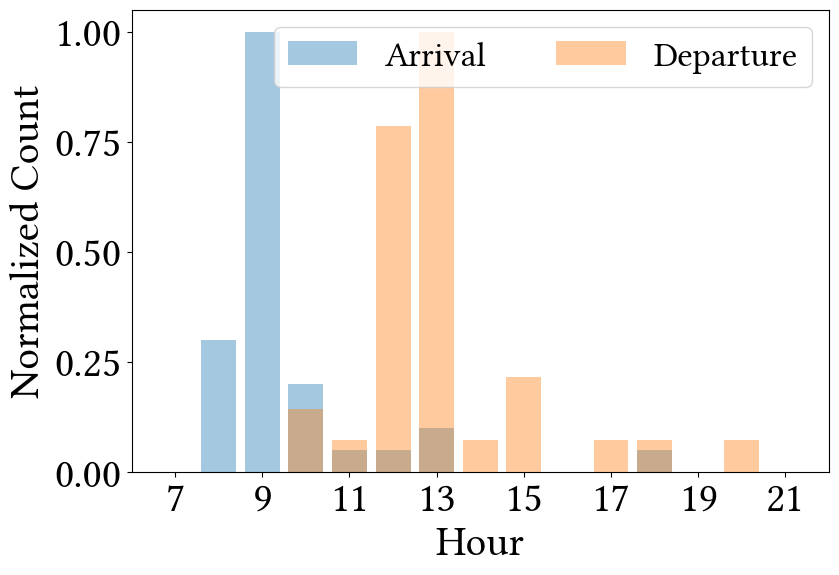

In [16]:
fig, ax = plt.subplots(figsize=(9,6))

initb = np.unique(init, return_counts=True)
idi = ~np.isnan(initb[0])
lastb = np.unique(last, return_counts=True)
idl = ~np.isnan(lastb[0])

ax.bar(initb[0][idi], initb[1][idi]/np.max(initb[1][idi]), label='Arrival', alpha=.4)
ax.bar(lastb[0][idl], lastb[1][idl]/np.max(lastb[1][idl]), label='Departure', alpha=.4)

ax.set_xlabel('Hour')
ax.set_ylabel('Normalized Count')

ax.set_xlim([6,22])
ax.set_xticks(np.arange(7,23,2))

ax.legend(ncols=2, fontsize=25)

plt.savefig(f'../pics/static/hours/car{index+1}_hours.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [17]:
for idc in range(13):
    car = cars.loc[idc,['id1','id2','id3','id4']].to_numpy()
    selected = data[data["id"].isin(car)]
    selected = selected.set_index(pd.to_datetime(selected['time']))

    sel = selected.groupby(pd.Grouper(freq='1H')).size().to_frame()
    sel[sel > 1] = 1

    pivot_table = sel.pivot_table(
        values=0,
        index=sel.index.date,
        columns=sel.index.hour,
        aggfunc="sum",
    )

    init = pivot_table.apply(find_first_match, axis=1)
    last = pivot_table.apply(find_last_match, axis=1)

    initb = np.unique(init, return_counts=True)
    idi = ~np.isnan(initb[0])
    lastb = np.unique(last, return_counts=True)
    idl = ~np.isnan(lastb[0])

    fig, ax = plt.subplots(figsize=(9,6))
    ax.bar(initb[0][idi], initb[1][idi]/np.max(initb[1][idi]), label='Arrival', alpha=.4)
    ax.bar(lastb[0][idl], lastb[1][idl]/np.max(lastb[1][idl]), label='Departure', alpha=.4)

    ax.set_xlabel('Hour')
    ax.set_ylabel('Normalized Count')

    ax.set_xlim([5,22])
    ax.set_xticks(np.arange(6,21,2))

    ax.legend(ncols=2, fontsize=25)

    plt.savefig(f'../pics/static/hours/car{idc+1}_hours.pdf',format='pdf',bbox_inches='tight')
    plt.close()

### Week Evolution

In [18]:
index = 0
car = cars.loc[index,['id1','id2','id3','id4']].to_numpy()
selected = data[data["id"].isin(car)]
selected = selected.set_index(pd.to_datetime(selected['time']))

In [19]:
sel = selected.groupby(pd.Grouper(freq='1T')).size().to_frame()
sel[sel > 1] = 1

sel = sel.groupby(pd.Grouper(freq='1D')).sum()

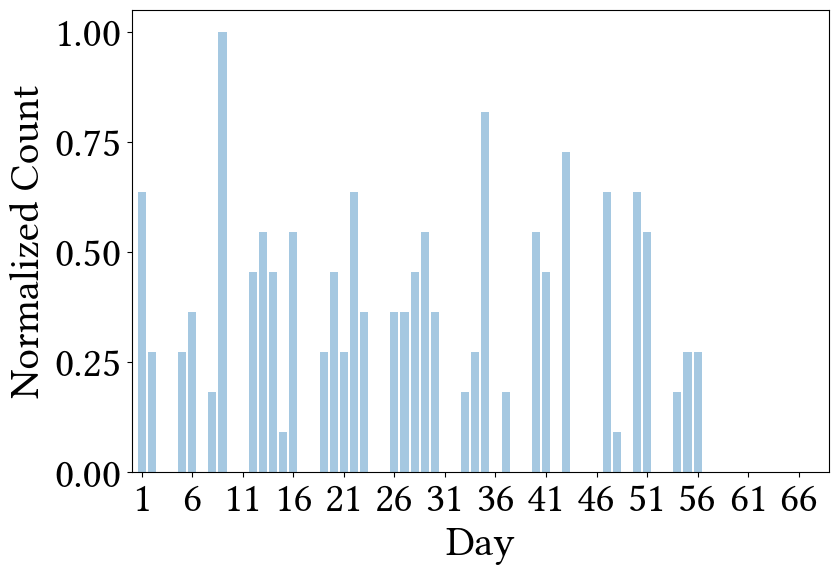

In [26]:
fig, ax = plt.subplots(figsize=(9,6))

ax.bar(range(1,len(sel.index)+1), sel[0].to_numpy()/np.max(sel[0].to_numpy()),alpha=.4)

ax.set_xlabel('Day')
ax.set_ylabel('Normalized Count')

ax.set_xticks(np.arange(1,69,5))
ax.set_xlim([0,69])
plt.savefig(f'../pics/static/days/car{index+1}_days.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [35]:
for idc in range(13):
    car = cars.loc[idc,['id1','id2','id3','id4']].to_numpy()
    selected = data[data["id"].isin(car)]
    selected = selected.set_index(pd.to_datetime(selected['time']))

    sel = selected.groupby(pd.Grouper(freq='1T')).size().to_frame()
    sel[sel > 1] = 1

    sel = sel.groupby(pd.Grouper(freq='1D')).sum()

    fig, ax = plt.subplots(figsize=(9,6))

    ax.bar(range(1,len(sel.index)+1), sel[0].to_numpy()/np.max(sel[0].to_numpy()),alpha=.4)

    ax.set_xlabel('Day')
    ax.set_ylabel('Normalized Count')

    ax.set_xticks(np.arange(1,69,5))
    ax.set_xlim([0,69]) 
    plt.savefig(f'../pics/static/days/car{idc+1}_days.pdf',format='pdf',bbox_inches='tight')
    plt.close()

## Pressure Information

In [28]:
index = 0
car = cars.loc[index,['id1','id2','id3','id4']].to_numpy()
selected = data[data["id"].isin(car)]
selected = selected.set_index(pd.to_datetime(selected['time']))

In [29]:
anonym = [f'C{index+1}.FL', f'C{index+1}.FR', f'C{index+1}.RR', f'C{index+1}.RL']
car_dic = {}
for (i,label) in enumerate(car):
    car_dic[label] = anonym[i]

In [30]:
selected['pressure'] = 6.89476*selected['pressure_PSI'] + selected['pressure_kPa'].fillna(0)

In [ ]:
pressures = selected[['id','pressure']].groupby(by=[pd.Grouper(freq='1H'),'id']).mean().unstack().ffill().bfill()
pressures = pressures['pressure']
pressures.head(10)

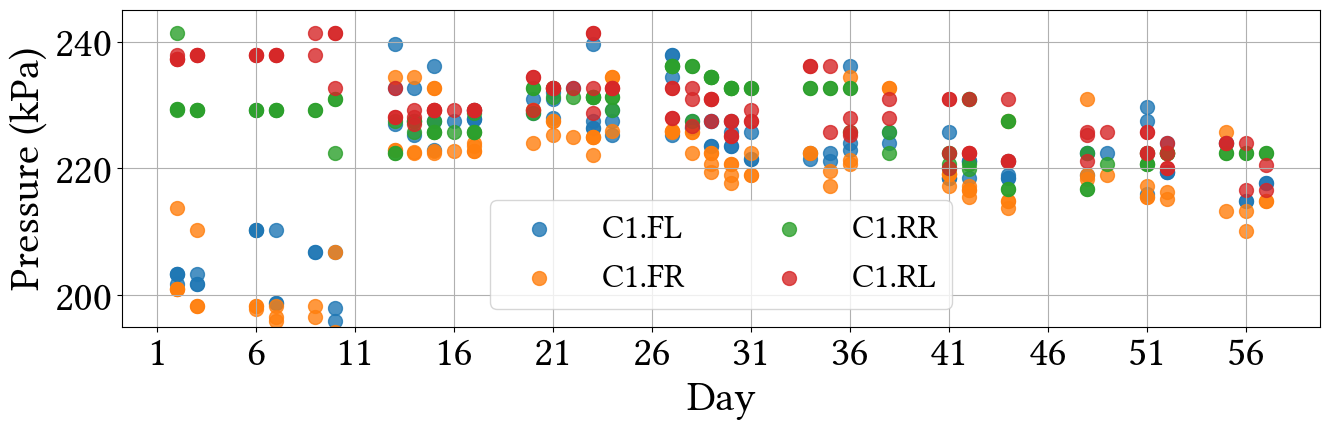

In [34]:
# Resample the data to fill missing hours with zeros
pressures_resamp = pressures.resample('H').asfreq().fillna(0)

# Generating a mapping from actual dates to generic day labels
unique_days = sorted(set(pressures_resamp.index.date))
day_mapping = {date: i+1 for i, date in enumerate(unique_days)}

# Applying the day mapping to the DataFrame
pressures_resamp['Day'] = [day_mapping.get(date) for date in pressures_resamp.index.date]

# Plotting
plt.figure(figsize=(14, 5))
for sensor_id in car:
    # Filter out the zero values to not display them in the plot
    sensor_data = pressures_resamp[pressures_resamp[sensor_id] != 0]
    plt.scatter(sensor_data['Day'], sensor_data[sensor_id], label=car_dic[sensor_id], alpha=.8, s=100)

# Set x-ticks to appear every 5 days using MaxNLocator
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x+1)))
# plt.xlim([-0.5,37.5])
plt.ylim([195, 245])

plt.xlabel('Day')
plt.ylabel('Pressure (kPa)')
plt.legend(fontsize=25, ncol=2)
plt.grid(True)
plt.tight_layout()
plt.savefig(f'../pics/pressure/car{index+1}_pressure.pdf', format='pdf', bbox_inches='tight')
plt.show()